In [6]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
# 말뭉치 500개 사용
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [3]:
# 데이터확인
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(25000,) (25000,)
(25000,) (25000,)


In [4]:
# 훈련 및 검증 데이터셋으로 분류
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

print(train_input.shape,train_target.shape)
print(val_input.shape,val_target.shape)

(20000,) (20000,)
(5000,) (5000,)


In [5]:
# 정규화 : 단어의 길이 맞추기
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 훈련 및 검증 데이터 100단어 정규화하기
train_seq = pad_sequences(train_input, maxlen=100,truncating="pre",padding="pre")
val_seq = pad_sequences(val_input, maxlen=100,truncating="pre",padding="pre")
print(train_input.shape,train_seq.shape)
print(val_input.shape,val_seq.shape)

(20000,) (20000, 100)
(5000,) (5000, 100)


In [8]:
# 인공 신경망 모델 생성
from tensorflow import keras

model = keras.Sequential()
model

In [10]:
# 단어 임베딩 방식 사용을 위해 계층 추가
# 입력 데이터 100, 출력은 16개, 말뭉치 500개
model.add(keras.layers.Embedding(500,16,input_length=100))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
Total params: 8,000
Trainable params: 8,000
Non-trainable params: 0
_________________________________________________________________


In [12]:
# LSTM 계층 추가
model.add(keras.layers.LSTM(8))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
Total params: 8,800
Trainable params: 8,800
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 출력계층 추가
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 모델설정 : 컴파일
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [17]:
# 콜백 함수
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_lstm_model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

In [19]:
# 훈련
history = model.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),
         callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 14ms/step - loss: 0.6921 - accuracy: 0.5371 - val_loss: 0.6911 - val_accuracy: 0.5676
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6889 - accuracy: 0.5964 - val_loss: 0.6869 - val_accuracy: 0.6150
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6822 - accuracy: 0.6341 - val_loss: 0.6779 - val_accuracy: 0.6306
Epoch 4/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6626 - accuracy: 0.6443 - val_loss: 0.6423 - val_accuracy: 0.6042
Epoch 5/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6021 - accuracy: 0.6896 - val_loss: 0.5878 - val_accuracy: 0.7260
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5678 - accuracy: 0.7426 - val_loss: 0.5654 - val_accuracy: 0.7480
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5460 - accuracy: 0.7588 - val_loss: 0.5436 - val_accuracy:

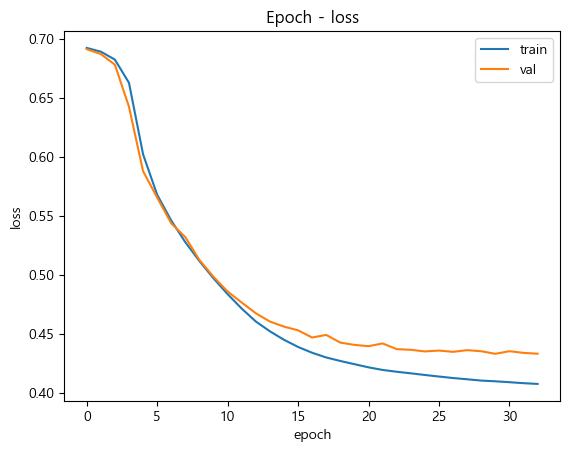

In [20]:
# 훈련 검증 손실 곡선 
# history 결과를 이용하여 손실곡선 그리기
# 훈련 손실과 검증 손실 비교
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["loss"],label="train")
plt.plot(history.epoch, history.history["val_loss"],label="val")
plt.title("Epoch - loss")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()

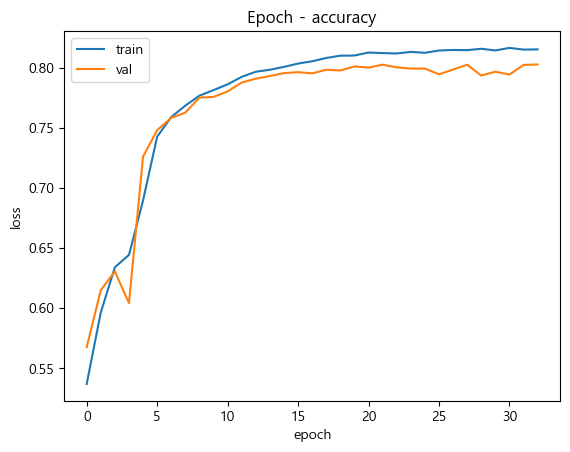

In [21]:
# 정확도 곡선
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["accuracy"],label="train")
plt.plot(history.epoch, history.history["val_accuracy"],label="val")
plt.title("Epoch - accuracy")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()

In [29]:
# 새로운 모델 생성
model2 = keras.Sequential()

# 단어 임베딩 방식 사용을 위해 계층 추가
# 입력 데이터 100, 출력은 16개, 말뭉치 500개
model2.add(keras.layers.Embedding(500,16,input_length=100))

# LSTM 계층 추가, 드롭아웃 속성 설정
model2.add(keras.layers.LSTM(8, dropout=0.1))

# 출력계층 추가
model2.add(keras.layers.Dense(1, activation="sigmoid"))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 모델설정 : 컴파일
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop,
             loss="binary_crossentropy",
             metrics=["accuracy"])

# 콜백 함수
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_lstmdropout_model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

# 훈련
history = model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),
         callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 6s 15ms/step - loss: 0.6925 - accuracy: 0.5454 - val_loss: 0.6915 - val_accuracy: 0.5974
Epoch 2/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6897 - accuracy: 0.6198 - val_loss: 0.6871 - val_accuracy: 0.6470
Epoch 3/100
313/313 [==============================] - 4s 14ms/step - loss: 0.6800 - accuracy: 0.6678 - val_loss: 0.6679 - val_accuracy: 0.6812
Epoch 4/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6272 - accuracy: 0.7060 - val_loss: 0.6051 - val_accuracy: 0.7220
Epoch 5/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5873 - accuracy: 0.7382 - val_loss: 0.5837 - val_accuracy: 0.7366
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5691 - accuracy: 0.7498 - val_loss: 0.5663 - val_accuracy: 0.7510
Epoch 7/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5510 - accuracy: 0.7622 - val_loss: 0.5480 - val_accuracy:

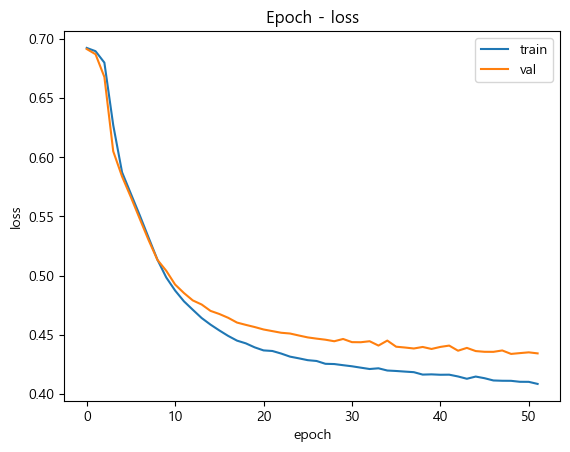

In [31]:
# 훈련 검증 손실 곡선 
# history 결과를 이용하여 손실곡선 그리기
# 훈련 손실과 검증 손실 비교
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["loss"],label="train")
plt.plot(history.epoch, history.history["val_loss"],label="val")
plt.title("Epoch - loss")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()

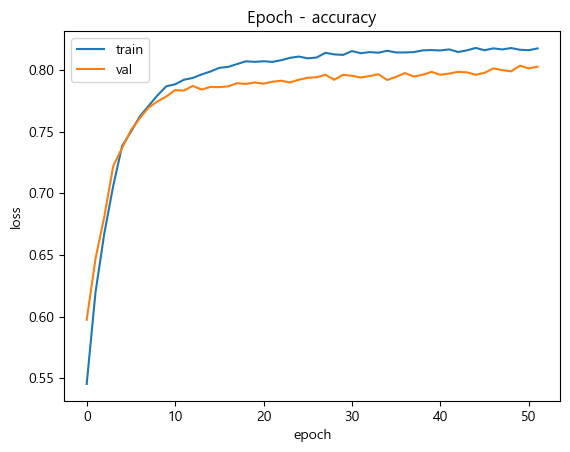

In [32]:
# 정확도 곡선
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["accuracy"],label="train")
plt.plot(history.epoch, history.history["val_accuracy"],label="val")
plt.title("Epoch - accuracy")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()

In [33]:
# LSTM 2개층 만들어서 연결
# 새 모델 생성
model3 = keras.Sequential()

# 단어 임베딩 방식 사용을 위해 계층 추가
# 입력 데이터 100, 출력은 16개, 말뭉치 500개
model3.add(keras.layers.Embedding(500,16,input_length=100))

# LSTM 계층 추가, 드롭아웃 속성 설정
# return_sequences : 두개의 LSTM을 연결할 때 사용
# 다음 LSTM으로 현재 가중치를 넘겨줌
model3.add(keras.layers.LSTM(8, dropout=0.1, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.1))

# 출력계층 추가
model3.add(keras.layers.Dense(1, activation="sigmoid"))

# 옵티마이저 정의
# 모델설정 : 컴파일
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop,
             loss="binary_crossentropy",
             metrics=["accuracy"])

# 콜백 함수
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_2rnn_model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

# 모델구조 확인
model3.summary()

# 훈련
history = model3.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),
         callbacks=[checkpoint_cb,early_stopping_cb])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 11s 29ms/step - loss: 0.6925 - accuracy: 0.5211 - val_loss: 0.6914 - val_accuracy: 0.6148
Epoch 2/100
313/313 [==================

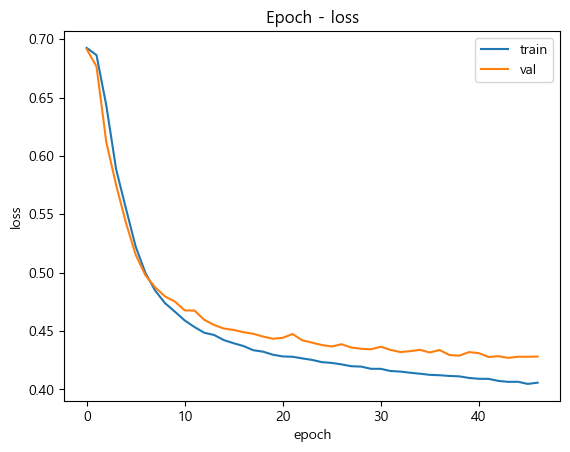

In [34]:
# 훈련 검증 손실 곡선 
# history 결과를 이용하여 손실곡선 그리기
# 훈련 손실과 검증 손실 비교
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["loss"],label="train")
plt.plot(history.epoch, history.history["val_loss"],label="val")
plt.title("Epoch - loss")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()

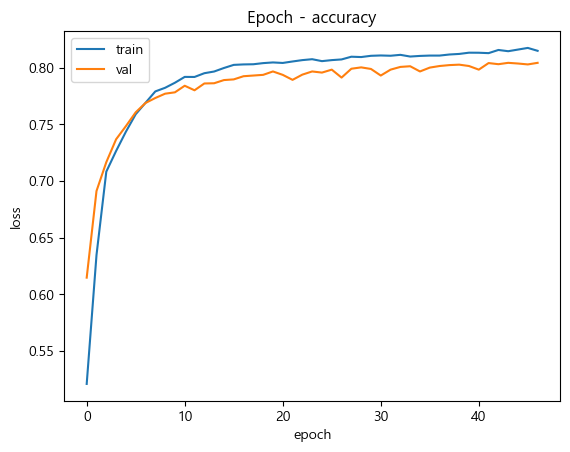

In [35]:
# 정확도 곡선
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["accuracy"],label="train")
plt.plot(history.epoch, history.history["val_accuracy"],label="val")
plt.title("Epoch - accuracy")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()

In [7]:
# 새 모델 생성
model4 = keras.Sequential()

# 단어 임베딩 방식 사용을 위해 계층 추가
# 입력 데이터 100, 출력은 16개, 말뭉치 500개
model4.add(keras.layers.Embedding(500,16,input_length=100))

# GRU 계층 생성
model4.add(keras.layers.GRU(8))

# 출력계층 추가
model4.add(keras.layers.Dense(1, activation="sigmoid"))

# 옵티마이저 정의
# 모델설정 : 컴파일
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop,
             loss="binary_crossentropy",
             metrics=["accuracy"])

# 콜백 함수
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best_2rnn_model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

# 모델구조 확인
model4.summary()

# 훈련
history = model4.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),
         callbacks=[checkpoint_cb,early_stopping_cb])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
313/313 [==============================] - 6s 16ms/step - loss: 0.6923 - accuracy: 0.5437 - val_loss: 0.6917 - val_accuracy: 0.5606
Epoch 2/100
313/313 [==============================] - 5s 15ms/step - loss: 0.6905 - accuracy: 0.5699 - val_loss: 0.6897 - val_accuracy: 0.5782
Epoch 3/100
313/313 [=========

Epoch 52/100
313/313 [==============================] - 5s 16ms/step - loss: 0.4144 - accuracy: 0.8167 - val_loss: 0.4465 - val_accuracy: 0.7882


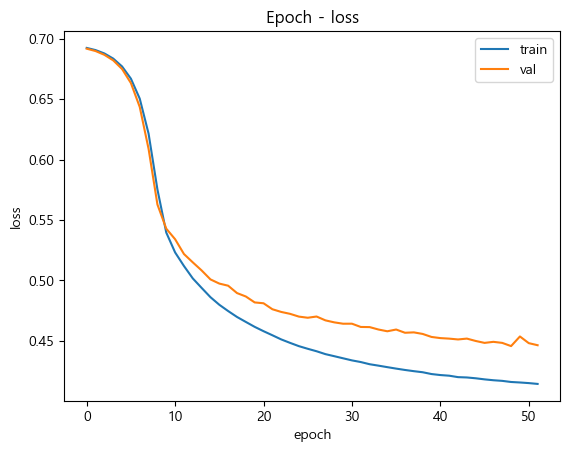

In [8]:
# 훈련 검증 손실 곡선 
# history 결과를 이용하여 손실곡선 그리기
# 훈련 손실과 검증 손실 비교
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["loss"],label="train")
plt.plot(history.epoch, history.history["val_loss"],label="val")
plt.title("Epoch - loss")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()

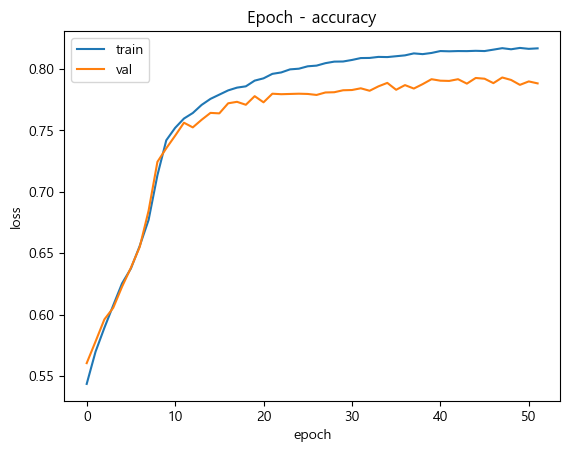

In [9]:
# 정확도 곡선
import matplotlib.pyplot as plt

# 한글처리
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history.epoch, history.history["accuracy"],label="train")
plt.plot(history.epoch, history.history["val_accuracy"],label="val")
plt.title("Epoch - accuracy")
plt.xlabel("epoch")
plt.ylabel("loss")


plt.legend()
plt.show()

In [11]:
# 테스트 데이터로 성능평가
# 테스트 데이터 전처리
# 다른 모델로도 해보기               
test_seq = pad_sequences(test_input, maxlen=100,truncating="pre",padding="pre")
model4.evaluate(test_seq,test_target)

782/782 [==============================] - 2s 3ms/step - loss: 0.4385 - accuracy: 0.7968


[0.4385008215904236, 0.7968000173568726]